In [33]:
from keras.datasets import imdb

In [34]:
(train_data, train_label), (test_data, test_label) = imdb.load_data(num_words=10000)

In [35]:
train_data.ndim

1

In [36]:
train_data.shape

(25000,)

In [37]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [38]:
one_hot_train_data = vectorize_sequences(train_data)

In [39]:
one_hot_train_data.shape

(25000, 10000)

In [40]:
one_hot_test_data = vectorize_sequences(test_data)

In [41]:
train_label = np.asarray(train_label).astype('float32')

In [42]:
test_label = np.asarray(test_label).astype('float32')

In [43]:
from keras import models
from keras import layers

In [44]:
from keras import regularizers

In [45]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                       activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), 
                      activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [50]:
x_val = one_hot_train_data[:10000]
y_val = train_label[:10000]

In [51]:
partial_train_data = one_hot_train_data[10000:]
partial_train_label = train_label[10000:]

In [52]:
model.compile(loss = 'binary_crossentropy', 
             optimizer = 'rmsprop', 
             metrics = ['accuracy'])

In [54]:
history = model.fit(partial_train_data, partial_train_label, epochs=20, 
         batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.1232 - accuracy: 0.9801 - val_loss: 0.4657 - val_accuracy: 0.8656
Epoch 2/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.1259 - accuracy: 0.9782 - val_loss: 0.4635 - val_accuracy: 0.8663
Epoch 3/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.1239 - accuracy: 0.9795 - val_loss: 0.4635 - val_accuracy: 0.8685
Epoch 4/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.1205 - accuracy: 0.9814 - val_loss: 0.4658 - val_accuracy: 0.8670
Epoch 5/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.1167 - accuracy: 0.9825 - val_loss: 0.4727 - val_accuracy: 0.8664
Epoch 6/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.1147 - accuracy: 0.9835 - val_loss: 0.4790 - val_accuracy: 0.8655
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [62]:
all_val_mae = history.history['val_loss']

In [63]:
type(all_val_mae)

list

In [64]:
len(all_val_mae)

20

Text(0, 0.5, 'Validation loss')

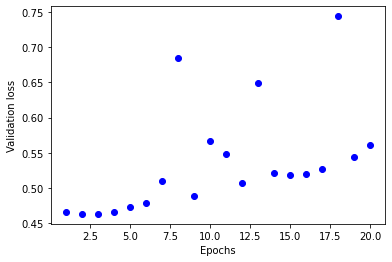

In [65]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(all_val_mae)+1), all_val_mae, 'bo')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')

In [66]:
b_model = models.Sequential()
b_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
b_model.add(layers.Dense(16, activation='relu'))
b_model.add(layers.Dense(1, activation='sigmoid'))
b_model.compile(loss = 'binary_crossentropy', 
               optimizer = 'rmsprop', 
               metrics = ['accuracy'])

In [67]:
b_history = b_model.fit(partial_train_data, partial_train_label, 
           epochs = 20, batch_size = 512, validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 308us/step - loss: 0.5445 - accuracy: 0.7815 - val_loss: 0.4204 - val_accuracy: 0.8738
Epoch 2/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.3380 - accuracy: 0.8986 - val_loss: 0.3340 - val_accuracy: 0.8742
Epoch 3/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.2459 - accuracy: 0.9238 - val_loss: 0.2843 - val_accuracy: 0.8911
Epoch 4/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.1927 - accuracy: 0.9383 - val_loss: 0.2885 - val_accuracy: 0.8853
Epoch 5/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.1560 - accuracy: 0.9518 - val_loss: 0.2734 - val_accuracy: 0.8901
Epoch 6/20
15000/15000 [==============================] - 1s 99us/step - loss: 0.1295 - accuracy: 0.9617 - val_loss: 0.2829 - val_accuracy: 0.8881
Epoch 7/20
15000/15000 [==============================] - 1s 10

In [69]:
b_all_val_loss = b_history.history['val_loss']

Text(0, 0.5, 'Validation loss')

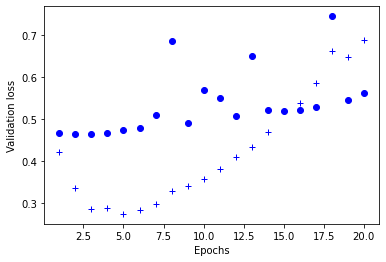

In [70]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(all_val_mae)+1), all_val_mae, 'bo')
plt.plot(range(1, len(all_val_mae)+1), b_all_val_loss, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')